In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
import torch
a = torch.randn(2, 3).to_sparse().requires_grad_(True)
print(a)
#a.values = torch.ones_like(a.values())
values = torch.ones(a._nnz())
#len(a.values)
a.indices()
sparse_tensor = torch.sparse_coo_tensor(a.indices(), torch.ones(a._nnz()), a.size(), requires_grad=True)
sparse_tensor

tensor(indices=tensor([[0, 0, 0, 1, 1, 1],
                       [0, 1, 2, 0, 1, 2]]),
       values=tensor([-0.2948,  0.3300,  1.6334, -1.0311,  0.4621, -1.1239]),
       size=(2, 3), nnz=6, layout=torch.sparse_coo, requires_grad=True)


tensor(indices=tensor([[0, 0, 0, 1, 1, 1],
                       [0, 1, 2, 0, 1, 2]]),
       values=tensor([1., 1., 1., 1., 1., 1.]),
       size=(2, 3), nnz=6, layout=torch.sparse_coo, requires_grad=True)

In [4]:
# Read in the data
#df = pd.read_csv('results/Relations_Important_all.csv', sep=',')
df = pd.read_csv('Relations_Important_all_IMDb_us_onegenre.csv', sep=',')
df.set_index('node_idx', inplace=True)
df['tot'] = df.sum(axis=1)
gb = df.groupby('label')    
#gb.get_group(0)
df

,label,hasPhotoCollection,date,title,type,SeeAlso,label.1,subClassOf,sameAs,subject,...,production_company_name,production_company_production_companyid,rating,runtime,sequel,story_contributor,writer,writer_name,writer_writerid,tot
node_idx,,,,,,,,,,,,,,,,,,,,,
7433,0,NaN,NaN,NaN,1,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
7517,0,NaN,NaN,NaN,1,NaN,0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
7366,0,NaN,NaN,NaN,1,NaN,0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
7272,0,NaN,NaN,NaN,1,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0
7625,0,NaN,NaN,NaN,1,NaN,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7950,1,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
7853,1,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
7947,1,NaN,NaN,NaN,1,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0


In [7]:
#Get the relative importance of each relation for each class (divided by the total importance score of the class)


for i in np.unique(df['label']):
    exec(f'group_{i} = gb.get_group(i)')
    exec(f'group_rel_{i} = group_{i}.iloc[:,1:].div(group_{i}.tot, axis=0)')
    exec(f'group_rel_{i} = group_rel_{i}.drop(columns=["tot"])')
    exec(f'group_max_{i} = group_rel_{i}.idxmax(axis=1)')

#group_rel_0
print('group_max_0: \n', group_max_0.value_counts(),
      '\n group_max_1 \n', group_max_1.value_counts())#,
        # '\n group_max_2 \n', group_max_2.value_counts(),
        # '\n group_max_3 \n', group_max_3.value_counts())


group_max_0: 
 type           36
performance     3
dtype: int64 
 group_max_1 
 type    24
dtype: int64


In [18]:
group_max_0#.dropna(axis=1, how='all')


node_idx
7433           type
7517           type
7366           type
7272           type
7625           type
7426           type
7486           type
7558    performance
7290           type
7393           type
7233           type
7585           type
7313           type
7595           type
7317           type
7796           type
7757           type
7751           type
7938           type
7925    performance
7919    performance
7816           type
7828           type
7922           type
7954           type
7831           type
7864           type
7851           type
7920           type
7953           type
7749           type
7758           type
7806           type
7868           type
7843           type
7784           type
7754           type
7768           type
7769           type
dtype: object

In [12]:
df_rel = df.iloc[:,1:].div(df.tot, axis=0)
df_rel['label'] = df['label']

df_rel.dropna(axis=1, how='all')


,hasPhotoCollection,date,title,type,label.1,sameAs,subject,based_near,actor,cinematographer,...,music_contributor,performance,prequel,producer,production_company,runtime,sequel,writer,tot,label
node_idx,,,,,,,,,,,,,,,,,,,,,
7433,NaN,NaN,NaN,0.200000,0.000000,NaN,NaN,NaN,NaN,0.200000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
7517,NaN,NaN,NaN,0.200000,0.000000,NaN,0.200000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
7366,NaN,NaN,NaN,0.166667,0.000000,NaN,0.166667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
7272,NaN,NaN,NaN,0.166667,0.000000,NaN,NaN,NaN,NaN,0.166667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
7625,NaN,NaN,NaN,0.200000,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7950,NaN,NaN,NaN,0.200000,0.200000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
7853,NaN,NaN,NaN,0.200000,0.200000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1
7947,NaN,NaN,NaN,0.166667,0.166667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1


In [9]:
from dfply import *
# summary statistics for dependent variable AUTHOR
df_rel >> group_by(X.label) >> summarize(n=X['author'].count(), mean=X['author'].mean(), std=X['author'].std())
# output

KeyError: 'author'

In [19]:
from dfply import *
# summary statistics for dependent variable AUTHOR
df_rel >> group_by(X.label) >> summarize(n=X['type'].count(), mean=X['type'].mean(), std=X['type'].std())
# output

,label,n,mean,std
0,0,39,0.234280,0.082142
1,1,24,0.175099,0.024681


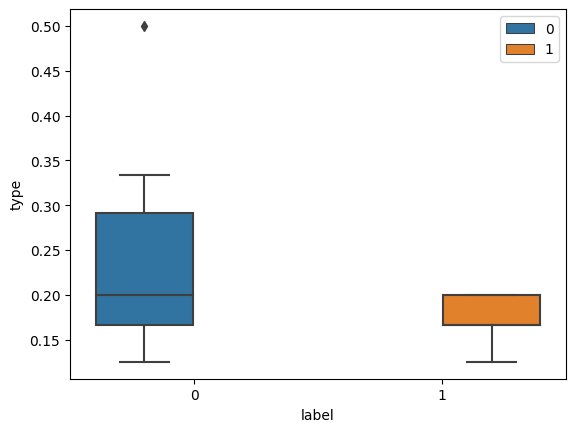

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
#fig, axs = plt.subplots(ncols=2)
sns.boxplot(data=df_rel, x="label", y="type",  hue=df.label.tolist())
#sns.boxplot(data=df_rel, x="plant_var", y="canopy_vol", hue=df.plant_var..tolist(), ax=axs[1])
plt.show()

In [82]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('author + fax ~ label', data=df)
print(fit.mv_test())

                                Multivariate linear model
                                                                                          
------------------------------------------------------------------------------------------
       Intercept                Value         Num DF  Den DF        F Value         Pr > F
------------------------------------------------------------------------------------------
          Wilks' lambda               -0.0000 2.0000 23.0000 -7398770816394397.0000 1.0000
         Pillai's trace                1.0000 2.0000 23.0000 -7398770816394398.0000 1.0000
 Hotelling-Lawley trace -643371375338643.2500 2.0000 23.0000 -7398770816394397.0000 1.0000
    Roy's greatest root -643371375338643.2500 2.0000 23.0000 -7398770816394397.0000 1.0000
------------------------------------------------------------------------------------------
                                                                                          
--------------------------------

In [85]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(group_rel_0['author'], group_rel_1['author'])
print(fvalue, pvalue)

nan nan
